<a href="https://colab.research.google.com/github/Carlogui/IMEC_2543/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>

<br>

<font color='black' align="center"><h1> </h1></font>

<font color='black'><h1 align="center">Dinámica de Maquinaria IMEC – 2543</h1></font>

<font color='black'><h1 align="center">Profesor: Johnathan Camargo</h1></font>

<font color='black'><h1 align="center">Tarea 2</h1></font>

<font color='black'><h1 align="center">Carlos Ernesto Upegui - 202213004</h1></font>

<br>

<br>

<font color='black'><center>27 de Febrero 2025<br>Primer Semestre 2025 <br>Bogotá DC – Colombia </center><br></font>

In [117]:
#Librerías necesarias para el taller
import sympy as sp
import numpy as np
from numpy import linspace, arange, radians, deg2rad, degrees, cos, sin, pi, sqrt, cos, array, piecewise, hypot
from sympy.vector import CoordSys3D, cross, dot
from sympy import Matrix, nsimplify, init_printing, pretty, simplify, symbols,  solve, Function, Eq, Matrix, pretty, lambdify, diff
import matplotlib.pyplot as plt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
import math
from scipy.optimize import fsolve, least_squares
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

<em><font color='black'><left>Definimos las variables</left></font></em>



In [118]:
# Variables dinamicas (angluos)

xi1, xi2, xi3, xi4 = dynamicsymbols('xi1 xi2 xi3 xi4')

#Se definen los parametros iniciales

r1, r2, r3, r4, t= symbols('r1 r2 r3 r4 t')

L1, L2, L3, L4,= symbols('L1 L2 L3 L4')

valores_definidos = {L1: 300.00, #mm

                     L2: 1350, #mm

                     L3: 300.00, #mm

                     L4: 1350, #mm

                     }

allVars = [xi1, xi2, xi3, xi4]

allVarsDot = [v.diff(t) for v in allVars]

allVarsDDot = [v.diff(t) for v in allVarsDot]

#Marco de referencia

N = ReferenceFrame('N')

A = N.orientnew('A', 'Axis', [xi1, N.z])

B = A.orientnew('B', 'Axis', [-xi2, N.z])

C = B.orientnew('C', 'Axis', [-xi3, N.z])

D = B.orientnew('D', 'Axis', [xi4, N.z])


<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [119]:
# Loop de vectores
Loop = {}

Loop[r1] = L2 * A.x

Loop[r2] = L3 * B.x

Loop[r3] = L4 * C.x

Loop[r4] = -L1 * D.x

# Definimos un diccionario para las ecuaciones
Ecuaciones = {}

# Definimos la ecuacion del loop
Ecuaciones['Loop'] = Loop[r1] + Loop[r2] + Loop[r3] + Loop[r4]

Ecuaciones['Loop_params'] = Ecuaciones['Loop'].subs(valores_definidos)

Ecuaciones['Loop_params_fun'] = sp.lambdify([xi1, xi2, xi3, xi4], [Ecuaciones['Loop_params'].dot(N.x), Ecuaciones['Loop_params'].dot(N.y),])

#La posicion de cada punto
puntos = {

    'O2': 0 * N.x,

    'A1': Loop[r1],

    'B1': Loop[r1] + Loop[r2] ,

    'O4': Loop[r1] + Loop[r2] + Loop[r3],

}

points_fun = {k: sp.lambdify(allVars,

              [v.dot(N.x).subs(valores_definidos), v.dot(N.y).subs(valores_definidos)])

              for k, v in puntos.items()}

#funcion para graficar.
def plotMechanism(joint_values, ax=None):

    O2 = points_fun['O2'](*joint_values)

    A1 = points_fun['A1'](*joint_values)

    B1 = points_fun['B1'](*joint_values)

    O4 = points_fun['O4'](*joint_values)

    if ax is None:

        ax = plt.figure().add_subplot(111)

    ax.plot([O2[0], A1[0]], [O2[1], A1[1]], color='#8A0947',marker = 'p',)

    ax.plot([A1[0], B1[0]], [A1[1], B1[1]], color='#DB3813',marker = 'p' ,)

    ax.plot([B1[0], O4[0]], [B1[1], O4[1]], color='#480745',marker = 'p',)

    ax.set_aspect('equal')

Ecuaciones['Loop_params']

1350*A.x + 300.0*B.x + 1350*C.x - 300.0*D.x

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 5.170e-26]
           x: [ 2.234e+00  0.000e+00]
        cost: 1.3363823550460978e-51
         jac: [[ 6.067e-02  1.341e-03]]
        grad: [ 3.137e-27  6.933e-29]
  optimality: 3.1365726524501683e-27
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 1
        njev: 1

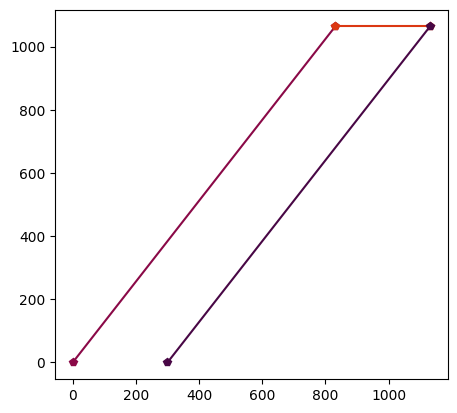

In [120]:
#Compruebo que tan cerca esta mi analisis grafico con least_squares
def loop_fun(unknowns):

  er=Ecuaciones['Loop_params_fun'](deg2rad(52), deg2rad(52), *unknowns)

  return np.sum(np.array(er)**2)

z_guess=[np.deg2rad(128),0]

opt_output=least_squares(loop_fun,z_guess)


loop_fun(z_guess)

plotMechanism([np.deg2rad(52), np.deg2rad(52), *opt_output.x])

opt_output

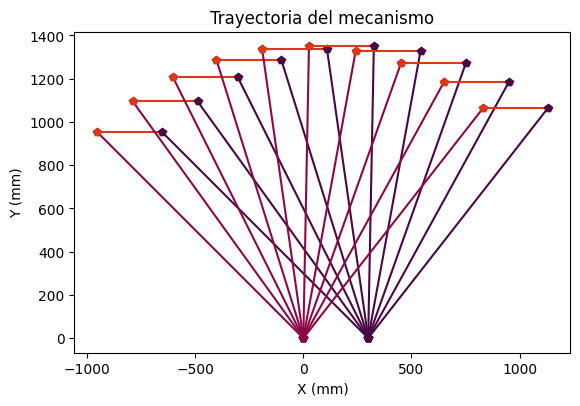

In [121]:
def loop_fun(unknowns, xi1_val, xi2_val):

    er = Ecuaciones['Loop_params_fun'](xi1_val, xi2_val, *unknowns)

    return np.sum(np.array(er)**2)

# trayectoria
xi1_vals = np.linspace(np.deg2rad(135), np.deg2rad(52), num=10)

xi2_vals = xi1_vals

trajectory = []

for xi1_val, xi2_val in zip(xi1_vals, xi2_vals):

    def loop_fun_trajectory(unknowns):

        return loop_fun(unknowns, xi1_val, xi2_val)

    z_guess = [np.deg2rad(180) - xi1_val, 0]

    opt_output = least_squares(loop_fun_trajectory, z_guess)

    trajectory.append([xi1_val, xi2_val, *opt_output.x])

# Graficamos la trayectoria
fig, ax = plt.subplots()

for joint_values in trajectory:
    plotMechanism(joint_values, ax=ax)

ax.set_title("Trayectoria del mecanismo")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
plt.show()

In [116]:
#Ahora para animar el mecanismo:

xi1_vals = np.concatenate((np.linspace(np.deg2rad(135), np.deg2rad(52), num=50),

                           np.linspace(np.deg2rad(52), np.deg2rad(135), num=50)))

xi2_vals = xi1_vals

trajectory = []

for xi1_val, xi2_val in zip(xi1_vals, xi2_vals):

    def loop_fun_trayectory(unknowns):

        return loop_fun(unknowns, xi1_val, xi2_val)

    z_guess = [np.deg2rad(180) - xi1_val, 0]

    opt_output = least_squares(loop_fun_trayectory, z_guess)

    trajectory.append([xi1_val, xi2_val, *opt_output.x])

#Funcon para animar mecanismo
def animateMechanism(theta1List, theta2List, theta3List, xList, tList=None, videoName="mechanism.gif"):
    fig, ax = plt.subplots()

    if tList is None:

        tList = np.linspace(0, 1, len(theta1List))

    def update(i):

        ax.clear()

        plotMechanism([theta1List[i], theta2List[i], theta3List[i], xList[i]], ax)

        ax.set_xlim(-1100, 1200)

        ax.set_ylim(0, 1400)

        ax.set_title(f"t={tList[i]:.2f} - Frame {i}")

    anim = animation.FuncAnimation(fig, update, frames=len(tList), interval=100, repeat=True)

    anim.save(videoName, writer="pillow", dpi=200)

    plt.close(fig)

theta1List, theta2List, theta3List, xList = zip(*trajectory)

animateMechanism(theta1List, theta2List, theta3List, xList)
